In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
#Import gold Csv File
df_gold = pd.read_csv("Data/GOLD.csv")
df_gold 

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [3]:
df_gold = df_gold.set_index('Date')
gold = df_gold.dropna()
gold

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...
"Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
"Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
"Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186


In [5]:
#Using linear regression to find the coefficients of the inputs and using the same trained model to complete the entire column.
#Also fitting the other column as well using a new linear regression model. 

y = np.array(gold["Pred"])
x = np.array(gold["new"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459


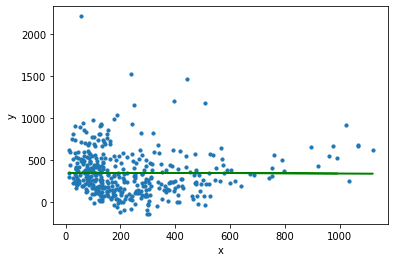

In [6]:
rmse = mean_squared_error(y, y_pred)

print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_pred, color='g')
plt.show()

In [7]:
pred = df_gold[:]
pred_new = pred['new']
pred_new = pred_new.values.reshape(-1,1)
pred_new = (model.predict(pred_new))

df_gold['Pred'] = pred_new
df_gold

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
...,...,...,...,...,...,...,...,...
"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,341.635810,247.177322
"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,343.240625,52.201158
"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,342.737786,113.293305


In [8]:
y = np.array(df_gold["new"])
x = np.array(df_gold["Pred"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)

model.fit(x, y)
y_pred = model.predict(x)
rmse = mean_squared_error(y, y_pred)

print('Slope:' ,model.coef_)
print('Intercept:',model.intercept_)
print('Root mean squared error: ', rmse)

Slope: [[-121.49444741]]
Intercept: [41754.03127127]
Root mean squared error:  1.2291678799353053e-23


Hence new is linear function of OHL columns and pred is polynomial function of OHL columns. 


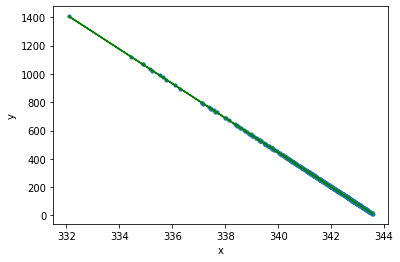

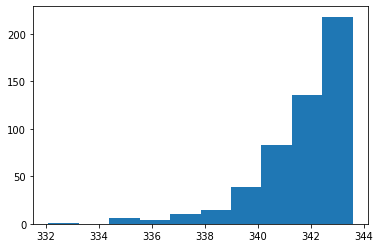

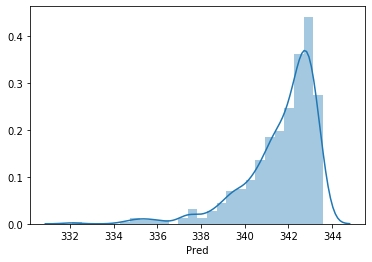

In [9]:
print("Hence new is linear function of OHL columns and pred is polynomial function of OHL columns. ")

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_pred, color='g')
plt.show()

plt.hist(df_gold['Pred'])
plt.show()

sns.distplot(df_gold['Pred'])
plt.show()

In [10]:
#Using linear regression (OLS), to calculate -
#The daily Beta value for the past 3 months. (Daily= Daily returns)
#The monthly Beta value. (Monthly= Monthly returns)

itc_data = pd.read_csv('Data/ITC.csv')
itc_data['Date'] = pd.to_datetime(itc_data['Date'])
itc_data = itc_data.sort_values('Date')
itc_data.set_index('Date', inplace=True)
itc_df = itc_data[itc_data["Series"] == "EQ"]
itc_df

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,ITC,EQ,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
2017-05-16,ITC,EQ,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2017-05-17,ITC,EQ,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
2017-05-18,ITC,EQ,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
2017-05-19,ITC,EQ,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,ITC,EQ,307.00,308.25,309.50,300.85,302.45,301.90,305.31,8655871,2.642695e+09,99220,4557484,52.65
2019-05-08,ITC,EQ,301.90,300.00,303.40,298.65,300.60,300.65,301.46,7876031,2.374343e+09,104147,4687591,59.52
2019-05-09,ITC,EQ,300.65,299.40,301.30,296.35,299.85,299.85,299.17,10223616,3.058551e+09,129794,5965688,58.35


In [11]:
nifty_df = pd.read_csv('Nifty50.csv')
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'])
nifty_df = nifty_df.sort_values('Date')
nifty_df.set_index('Date', inplace=True)
nifty_df

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86


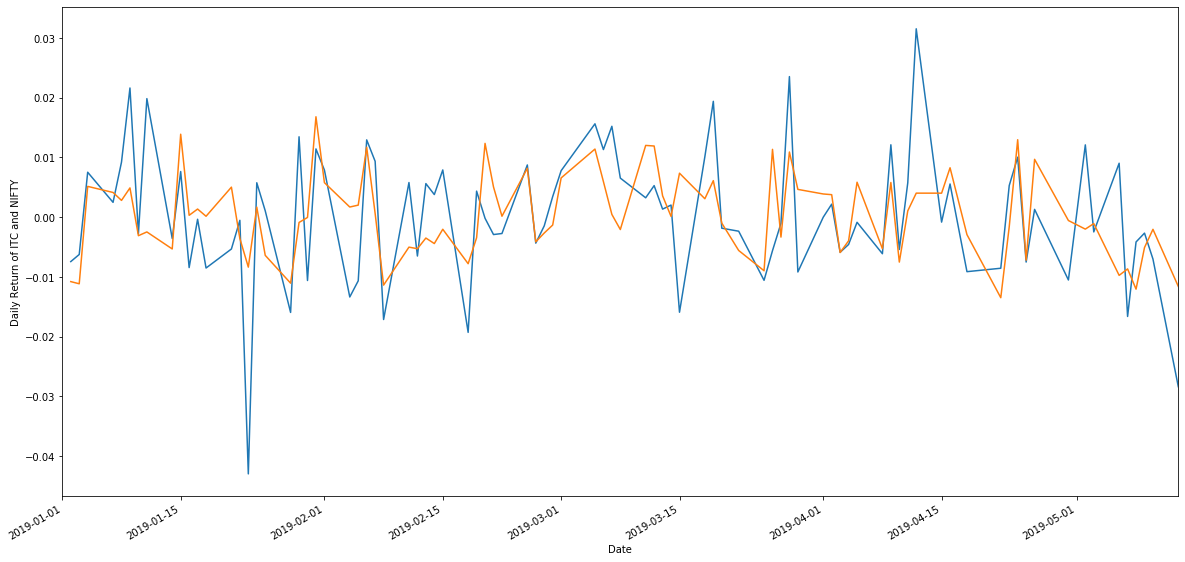

In [12]:
itc = itc_df[405:]
nifty = nifty_df[405:]

return_itc = itc['Close Price'].pct_change()
return_nifty = nifty['Close'].pct_change()

plt.figure(figsize=(20,10))
return_itc.plot()
return_nifty.plot()
plt.ylabel("Daily Return of ITC and NIFTY")
plt.show()

In [13]:
itc['pct_change'] = itc['Close Price'].pct_change()
nifty['pct_change']= nifty['Close'].pct_change()

x = itc['pct_change'].dropna()
y = nifty['pct_change'].dropna()

model = sm.OLS(y,x).fit()
model.summary()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pct_change   R-squared (uncentered):                   0.262
Model:                            OLS   Adj. R-squared (uncentered):              0.253
Method:                 Least Squares   F-statistic:                              30.81
Date:                Sun, 10 May 2020   Prob (F-statistic):                    3.04e-07
Time:                        15:12:26   Log-Likelihood:                          326.44
No. Observations:                  88   AIC:                                     -650.9
Df Residuals:                      87   BIC:                                     -648.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pct_change     0.3158      0.057      5.550      0.000       0.203       0.429
==============================================================================
Omnibus:                        2.650   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                2.451
Skew:                           0.325   Prob(JB):                        0.294
Kurtosis:                       2.504   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#importing monthly stock data
itc_m = pd.read_csv('Data/ITC.NS.csv', parse_dates=True, index_col='Date',)
nifty_m = pd.read_csv('Data/^NSEI.csv', parse_dates=True, index_col='Date')

mprices = pd.concat([itc_m['Close'], nifty_m['Close']], axis=1)
mprices.columns = ['ITC', 'NIFTY50']
mprices.head()

,ITC,NIFTY50
Date,,
2017-06-01,323.649994,9520.900391
2017-07-01,285.250000,10077.099609
2017-08-01,282.250000,9917.900391
2017-09-01,258.299988,9788.599609
2017-10-01,265.700012,10335.299805


In [15]:
mreturns = mprices.pct_change(1)
mreturns = mreturns.dropna(axis=0)  
mreturns.head()

,ITC,NIFTY50
Date,,
2017-07-01,-0.118647,0.058419
2017-08-01,-0.010517,-0.015798
2017-09-01,-0.084854,-0.013037
2017-10-01,0.028649,0.055851
2017-11-01,-0.036319,-0.010522


In [16]:
X = mreturns['ITC']
y = mreturns['NIFTY50']

X1 = sm.add_constant(X)
model = sm.OLS(y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NIFTY50   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     11.54
Date:                Sun, 10 May 2020   Prob (F-statistic):            0.00271
Time:                        15:12:47   Log-Likelihood:                 47.139
No. Observations:                  23   AIC:                            -90.28
Df Residuals:                      21   BIC:                            -88.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0125      0.007      1.827      0.0

C:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
print("Inference:\n")

print("In both the model calculations (Monthly and Daily) it is inferred that the Beta values are less than 1.\
 The beta value of ITC daily for last 3 months is ~0.3158 which suggests that the stock is less volatile than the market.\n \
The monthly beta value is ~0.3942 which suggests that the stock is less volatile than the market or index.")

Inference:

In both the model calculations (Monthly and Daily) it is inferred that the Beta values are less than 1. The beta value of ITC daily for last 3 months is ~0.3158 which suggests that the stock is less volatile than the market.
 The monthly beta value is ~0.3942 which suggests that the stock is less volatile than the market or index.
